# Group project Python

Spotify reached out to our company TM3 for assisance with their target ad campaign. Their sponsors do not believe their ads are being appropriately targeted. Spotify is looking for better ways to target adolcecents based on the type of music they listen to. 

Today, we are presenting to you, the management team at Spotify, with our findings. Your management team hopes that TM3's findings can help them better market their sponsor's ads in the upcoming year. 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [74]:
#Import original dataset-Research
research = pd.read_csv("research.csv")
research.head()

,Music,Slow songs or fast songs,Pop,Rock,"Hiphop, Rap",Latino,"Techno, Trance",Comedy,Romantic,Sci-fi,...,Folk,Country,Classical music,Musical,Metal or Hardrock,Punk,Opera,Movies,Horror,Thriller
0,5,3,5,5,1,1,1,5,4,4,...,1,2,2,1,1,1,1,5,4,2
1,4,4,3,5,1,2,1,4,3,4,...,1,1,1,2,4,4,1,5,2,2
2,5,5,3,5,1,5,1,4,2,4,...,2,3,4,5,3,4,3,5,3,4
3,5,3,5,3,5,4,2,5,2,3,...,3,2,4,3,1,2,2,5,4,4
4,5,3,2,5,4,3,1,5,2,3,...,3,2,3,3,5,3,3,5,5,5


In [75]:
#Make copy of original dataset to make changes
research2 = research.copy()
research2.head()

,Music,Slow songs or fast songs,Pop,Rock,"Hiphop, Rap",Latino,"Techno, Trance",Comedy,Romantic,Sci-fi,...,Folk,Country,Classical music,Musical,Metal or Hardrock,Punk,Opera,Movies,Horror,Thriller
0,5,3,5,5,1,1,1,5,4,4,...,1,2,2,1,1,1,1,5,4,2
1,4,4,3,5,1,2,1,4,3,4,...,1,1,1,2,4,4,1,5,2,2
2,5,5,3,5,1,5,1,4,2,4,...,2,3,4,5,3,4,3,5,3,4
3,5,3,5,3,5,4,2,5,2,3,...,3,2,4,3,1,2,2,5,4,4
4,5,3,2,5,4,3,1,5,2,3,...,3,2,3,3,5,3,3,5,5,5


In [76]:
#Delete out extra columns not pertaining to research questions.
research2.drop(research2.columns[21:], axis=1, inplace=True)
research2.head()

,Music,Slow songs or fast songs,Pop,Rock,"Hiphop, Rap",Latino,"Techno, Trance",Comedy,Romantic,Sci-fi,...,Action,Finances,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Age,Gender,Education,Village - town
0,5,3,5,5,1,1,1,5,4,4,...,2,3,4,3,3,1,20,female,college/bachelor degree,village
1,4,4,3,5,1,2,1,4,3,4,...,4,3,4,4,2,5,19,female,college/bachelor degree,city
2,5,5,3,5,1,5,1,4,2,4,...,1,2,4,4,3,4,20,female,secondary school,city
3,5,3,5,3,5,4,2,5,2,3,...,4,4,3,3,3,2,20,female,secondary school,village
4,5,3,2,5,4,3,1,5,2,3,...,4,2,3,3,1,4,20,male,secondary school,city


In [77]:
# Changing value names from int to object
# 1 & 2: dislike
# 3: netural
# 4 & 5: like

research2['Pop']=research2['Pop'].astype(str)
# research2.dtypes --> make sure type was changed correctly
Pop_dict={'1': 'dislike', '2':'dislike', '3':'neutral', '4':'like', '5':'like'}
research2['Pop']=research2['Pop'].map(Pop_dict)
research2

,Music,Slow songs or fast songs,Pop,Rock,"Hiphop, Rap",Latino,"Techno, Trance",Comedy,Romantic,Sci-fi,...,Action,Finances,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Age,Gender,Education,Village - town
0,5,3,like,5,1,1,1,5,4,4,...,2,3,4,3,3,1,20,female,college/bachelor degree,village
1,4,4,neutral,5,1,2,1,4,3,4,...,4,3,4,4,2,5,19,female,college/bachelor degree,city
2,5,5,neutral,5,1,5,1,4,2,4,...,1,2,4,4,3,4,20,female,secondary school,city
3,5,3,like,3,5,4,2,5,2,3,...,4,4,3,3,3,2,20,female,secondary school,village
4,5,3,dislike,5,4,3,1,5,2,3,...,4,2,3,3,1,4,20,male,secondary school,city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,5,3,neutral,3,5,2,5,5,3,4,...,3,4,3,4,4,4,22,male,secondary school,city
670,5,2,like,4,4,3,3,4,5,4,...,4,3,5,3,4,3,20,female,secondary school,city
671,4,3,neutral,4,3,1,1,3,5,2,...,3,1,2,2,2,2,18,female,secondary school,city
672,5,3,neutral,4,2,2,2,5,3,1,...,4,3,2,5,3,3,25,female,college/bachelor degree,city


AttributeError: 'AxesSubplot' object has no attribute 'sort'

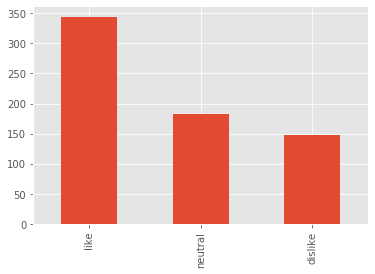

In [78]:
#Gender and music preferences
#Gender and Pop

gender_v_pop = research2['Pop'].value_counts().plot(kind='bar').sort()
plt.title('')
gender_v_pop

In [79]:
#Gender and music preferences
#Gender and Rock

In [ ]:
#Gender and music preferences
#Gender and Hip Hop/Rap

In [ ]:
#Gender and music preferences
#Gender and Latin

In [ ]:
#Gender and music preferences
#Gender and Techno/Trance(EDM)

In [ ]:
#Music Generes by gender
#Pie Chart: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

labels = 'Female', 'Male'

#count the number of males and females
print("The number of females is: ",(tips.sex=='Female').sum())
print("The number of males is: ",(tips.sex=='Male').sum())

#use numbers obtained to create the pie chart
sizes = [87, 157]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

#Plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()